# British Airways Reviews' Sentiment Analysis

This task aims to analyze the sentiment of customers of the british airways and take notes of common words and phrases used by customers with positive and negative reviews. This project can be a prelude to building a predictive model which predicts automatically if a customer's review is positive or negative and can help guide customer service attendants in attending to the reviews appropriately.

## Steps
* Libraries Importing
* Webscraping
* Data Wrangling
* Data Visualization
* Conclusion

# Libraries Importing

In [2]:
import requests
import bs4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")

# Web-Scraping

This step scraps reviews' data from the site *airlinequality.com* and saves it in an accepted data structure for the needed analysis.

In [ ]:
rating_dict = {}

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0",
    "Accept-Encoding": "*",
    "Connection": "keep-alive",
    "Referer": "http://www.google.com/"
}

for i in range(1, 368):
    resq = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/", headers=headers)
    soup_ = bs4.BeautifulSoup(resq.text, "lxml")
    rating_list = soup_.select(".rating-10")[1:]
    review_list = soup_.select(".text_content")
    
    for j in range(len(rating_list)):
        rating_dict[review_list[j].text] = rating_list[j].text.strip().split("/")[0]

Taking a look at the dictionary's content and length

In [8]:
rating_dict

{"✅ Trip Verified |   I hate British Airways! We get to London on Oct 3 and our next flight is cancelled. We stand in line with 1200 other people to get it fixed and they tell everyone to leave the airport and call them to fix. They book us the next day..via online. Don't offer vouchers for hotel, we will miss our tour. Now trying to get home from Istanbul. Plane is here but should have started loading an hour ago. No explanations. May miss next flight. Will never travel with them again. Was this same problem April 2022 flight.": '1',
 '✅ Trip Verified |\xa0 \xa0Our BA flight from Porto to London Heathrow T5 was operated by Finnair using a Finnair plane and crew. This had been advised by BA shortly after booking, with the option to change flights if we preferred. Although the business class cabin was of a similar layout to BA Club Europe, i.e. with the middle seat kept free, my wife and I felt the seats were more comfortable and the legroom slightly better. Service was good on board an

In [9]:
len(rating_dict.keys())

3577

Creating a dataframe of the scraped data we have

In [21]:
review_chunk = list(rating_dict.keys())
rating = list(rating_dict.values())

In [22]:
dataframe_dict = {"Review": review_chunk, "Rating": rating}

In [223]:
british_df = pd.DataFrame(dataframe_dict, index=range(3577))

Saving the scraped data in the *csv* format and loading it again we have

In [58]:
british_df.to_csv("British Airways Reviews Data Dirty")

In [83]:
british_df = pd.read_csv("British Airways Reviews Data Dirty", index_col=0)

In [84]:
british_df.head()

,Review,Rating
0,✅ Trip Verified | I hate British Airways! We...,1
1,✅ Trip Verified | Our BA flight from Porto t...,5
2,✅ Trip Verified | The customer services (call ...,3
3,✅ Trip Verified | I am a frequent flyer with...,5
4,Not Verified | Flew with BA to Punta Cana. To...,4


# Data Wrangling

There is a need to convert the columns to acceptable formats especially the review column which contains the verification status of the user's flight.

In [85]:
british_df["Review"].str.split("|", expand=True)
#No | in it

,0,1
0,✅ Trip Verified,I hate British Airways! We get to London on...
1,✅ Trip Verified,Our BA flight from Porto to London Heathrow...
2,✅ Trip Verified,The customer services (call centres etc) are ...
3,✅ Trip Verified,I am a frequent flyer with BA and have been...
4,Not Verified,Flew with BA to Punta Cana. Took the trouble...
...,...,...
3572,Flew return in CW from LHR to BKK in August 20...,None
3573,Flew LHR - VIE return operated by bmi but BA a...,None
3574,Flight from Heathrow to Toronto. Booked emerge...,None
3575,Business LHR to BKK. 747-400. First try back w...,None


There is a need to seperate the verification status of each user and their  actual reviews. From the above simply seperating using the seperator does not seem to do justice to some records.

In [86]:
# This is to modify the reviews such that we have a neater split
def input_symbol(text):
    
    if "|" in text.split(" "):
        pass
    else:
        text = "|" + text
    
    return(text)

In [87]:
modify_review = np.vectorize(input_symbol)

In [88]:
british_df["Review"] = modify_review(british_df["Review"])

In [89]:
british_df["Review"]

0       ✅ Trip Verified |   I hate British Airways! We...
1       |✅ Trip Verified |   Our BA flight from Porto ...
2       ✅ Trip Verified | The customer services (call ...
3       ✅ Trip Verified |   I am a frequent flyer with...
4       Not Verified |  Flew with BA to Punta Cana. To...
                              ...                        
3572    |Flew return in CW from LHR to BKK in August 2...
3573    |Flew LHR - VIE return operated by bmi but BA ...
3574    |Flight from Heathrow to Toronto. Booked emerg...
3575    |Business LHR to BKK. 747-400. First try back ...
3576    |This was a bmi Regional operated flight on a ...
Name: Review, Length: 3577, dtype: object

In [90]:
review_df = british_df["Review"].str.split("|", expand=True)
review_df

,0,1,2
0,✅ Trip Verified,I hate British Airways! We get to London on...,None
1,,✅ Trip Verified,Our BA flight from Porto to London Heathrow...
2,✅ Trip Verified,The customer services (call centres etc) are ...,None
3,✅ Trip Verified,I am a frequent flyer with BA and have been...,None
4,Not Verified,Flew with BA to Punta Cana. Took the trouble...,None
...,...,...,...
3572,,Flew return in CW from LHR to BKK in August 20...,None
3573,,Flew LHR - VIE return operated by bmi but BA a...,None
3574,,Flight from Heathrow to Toronto. Booked emerge...,None
3575,,Business LHR to BKK. 747-400. First try back w...,None


We seem to have a better split with more rows and investigating the first column we have the following

In [91]:
review_df[0].unique()

array(['✅ Trip Verified ', '', 'Not Verified ', '❎ Not Verified ',
       '✅ Verified Review ', '❎ Unverified '], dtype=object)

This shows that the first column is void of reviews and contain only the verification status of the flight in different formats. The next is to check for the appearance of verification status in the second column which contains the actual reviews.

In [92]:
review_df[review_df[1] == "✅ Trip Verified "].index

Int64Index([1, 7, 8, 47, 61, 129, 304, 626], dtype='int64')

We can see the appearance of verification status in the review column. Then we get all the rows with the verification status

In [93]:
emp = []

for ent in review_df[0].unique():
    
    viable = review_df[review_df[1] == ent]
    index = list(viable.index)
    emp.append(index)

In [94]:
emp

[[1, 7, 8, 47, 61, 129, 304, 626], [], [167], [], [2072], []]

In [95]:
index_list = []
for i in emp:
    for j in i:
        index_list.append(j)
    

The rows with verification status in the second column are

In [96]:
index_list

[1, 7, 8, 47, 61, 129, 304, 626, 167, 2072]

Seperating such rows and attaching them back after taking appropriate steps we have

In [97]:
prob_review_df =  review_df.iloc[index_list]
prob_review_df

,0,1,2
1,,✅ Trip Verified,Our BA flight from Porto to London Heathrow...
7,,✅ Trip Verified,Caught up in the Gatwick cancellation fiasc...
8,,✅ Trip Verified,BA has a real problem with boarding it's fl...
47,,✅ Trip Verified,Chaos at Terminal 5 with BA cancellations a...
61,,✅ Trip Verified,Late boarding led to a one hour flight leavi...
129,,✅ Trip Verified,. The BA first lounge at Terminal 5 was a zoo...
304,,✅ Trip Verified,Barbara Collins was super helpful. My boyfri...
626,,✅ Trip Verified,Rio De Janeiro to London Heathrow. Love this...
167,,Not Verified,"Mexico City Airport is a zoo, but taking the ..."
2072,,✅ Verified Review,Abu Dhabi to London. British Airways is usuall...


In [98]:
review_df = review_df.drop(2, axis=1)
prob_review_df = prob_review_df.drop(0, axis=1)

In [99]:
review_df.head()

,0,1
0,✅ Trip Verified,I hate British Airways! We get to London on...
1,,✅ Trip Verified
2,✅ Trip Verified,The customer services (call centres etc) are ...
3,✅ Trip Verified,I am a frequent flyer with BA and have been...
4,Not Verified,Flew with BA to Punta Cana. Took the trouble...


In [100]:
prob_review_df.head()

,1,2
1,✅ Trip Verified,Our BA flight from Porto to London Heathrow...
7,✅ Trip Verified,Caught up in the Gatwick cancellation fiasc...
8,✅ Trip Verified,BA has a real problem with boarding it's fl...
47,✅ Trip Verified,Chaos at Terminal 5 with BA cancellations a...
61,✅ Trip Verified,Late boarding led to a one hour flight leavi...


In [101]:
review_df.iloc[index_list] = prob_review_df

Checking the head of the new dataframe

In [102]:
review_df.head()

,0,1
0,✅ Trip Verified,I hate British Airways! We get to London on...
1,✅ Trip Verified,Our BA flight from Porto to London Heathrow...
2,✅ Trip Verified,The customer services (call centres etc) are ...
3,✅ Trip Verified,I am a frequent flyer with BA and have been...
4,Not Verified,Flew with BA to Punta Cana. Took the trouble...


Replacing this cleaned dataframe into the original dataframe we have

In [103]:
british_df["Review"] = review_df[1]
british_df["Trip Status"] = review_df[0]

In [104]:
british_df.head()

,Review,Rating,Trip Status
0,I hate British Airways! We get to London on...,1,✅ Trip Verified
1,Our BA flight from Porto to London Heathrow...,5,✅ Trip Verified
2,The customer services (call centres etc) are ...,3,✅ Trip Verified
3,I am a frequent flyer with BA and have been...,5,✅ Trip Verified
4,Flew with BA to Punta Cana. Took the trouble...,4,Not Verified


In [105]:
british_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 3576
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       3577 non-null   object
 1   Rating       3577 non-null   object
 2   Trip Status  3577 non-null   object
dtypes: object(3)
memory usage: 111.8+ KB


In [106]:
british_df["Review"][23]

'  We started our day with BA in Prague. The flight actually left on time! I came to find out that’s very unusual. We purchased business class seats. As you can see from the picture they hardly were business class. All they did was block off the middle seat in the first few rows and called it business class. Horrible flight. In addition I had a really rude rude check in clerk basically yell at me when I excused myself and asked if she could give a little bit of priority to the many business class passengers who weren’t being served. Then we got to Heathrow and the real fun began. We had a 4 hour delay. They gave us about 5 different excuses for the delay. I had a few employees walk away while I was asking them questions. They were very rude. At one point there were no employees left. And from the announcements it seems virtually every BA flight was delayed. And there were no weather issues. There was no place to comfortably store items in business class. I’ve never experienced that bef

It seems like we have redundant possible input for the *Trip Status* column so we collapse verything into two possible options *Verified* and *Unverified*.

In [107]:
british_df["Trip Status"].unique()

array(['✅ Trip Verified ', 'Not Verified ', '❎ Not Verified ', '',
       '✅ Verified Review ', '❎ Unverified '], dtype=object)

In [108]:
british_df["Trip Status"].value_counts()

                      1422
✅ Trip Verified       1140
✅ Verified Review      770
Not Verified           220
❎ Unverified            20
❎ Not Verified           5
Name: Trip Status, dtype: int64

In [109]:
british_df[british_df["Trip Status"] == ""]

,Review,Rating,Trip Status
1250,Two regular an uneventful flights. Curiously e...,7,
1891,Flew London Gatwick to Tampa with British Airw...,7,
1895,Frankfurt to Cape Town via London Heathrow. Th...,7,
1904,Bangkok to Manchester via London. I used to fl...,1,
1905,The return flight from St Lucia started well. ...,3,
...,...,...,...
3572,Flew return in CW from LHR to BKK in August 20...,5,
3573,Flew LHR - VIE return operated by bmi but BA a...,10,
3574,Flight from Heathrow to Toronto. Booked emerge...,7,
3575,Business LHR to BKK. 747-400. First try back w...,4,


In [110]:
def verified_update(status):
    
    if (status == "✅ Trip Verified ") or (status == "✅ Verified Review "):
        return "Verified"
    else:
        return "Unverified"

In [111]:
verify = np.vectorize(verified_update)

In [112]:
british_df["Verify"] = verify(british_df["Trip Status"])

In [113]:
british_df.head()

,Review,Rating,Trip Status,Verify
0,I hate British Airways! We get to London on...,1,✅ Trip Verified,Verified
1,Our BA flight from Porto to London Heathrow...,5,✅ Trip Verified,Verified
2,The customer services (call centres etc) are ...,3,✅ Trip Verified,Verified
3,I am a frequent flyer with BA and have been...,5,✅ Trip Verified,Verified
4,Flew with BA to Punta Cana. Took the trouble...,4,Not Verified,Unverified


Checking that our function actually worked by checking the number of rows

In [114]:
(british_df["Verify"] == "Verified").sum()

1910

In [115]:
((british_df["Trip Status"] == "✅ Trip Verified ") | (british_df["Trip Status"] == "✅ Verified Review ")).sum()

1910

Then we drop the *Trip Status* column as the same information is contained in the *Verify* column

In [ ]:
british_df = british_df.drop("Trip Status", axis=1)

Exploring the data we have

In [119]:
british_df.head()

,Review,Rating,Verify
0,I hate British Airways! We get to London on...,1,Verified
1,Our BA flight from Porto to London Heathrow...,5,Verified
2,The customer services (call centres etc) are ...,3,Verified
3,I am a frequent flyer with BA and have been...,5,Verified
4,Flew with BA to Punta Cana. Took the trouble...,4,Unverified


In [120]:
british_df["Verify"].value_counts()

Verified      1910
Unverified    1667
Name: Verify, dtype: int64

In [79]:
british_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 3576
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  3577 non-null   object
 1   Rating  3577 non-null   object
 2   Verify  3577 non-null   object
dtypes: object(3)
memory usage: 111.8+ KB


In [46]:
british_df["Rating"].isna().sum()

0

In [47]:
british_df["Review"].isna().sum()

0

In [48]:
british_df["Rating"].value_counts()

1     841
2     416
3     397
8     353
10    311
7     303
9     299
4     243
5     228
6     181
na      5
Name: Rating, dtype: int64

In [49]:
british_df[british_df["Rating"] == "na"]

,Review,Rating,Verify
3092,Cabin crew polite unfortunately BA ran out of ...,na,Unverified
3196,Phoenix to London - outbound a wonderful and e...,na,Unverified
3209,On past experience I chose BA for our long hau...,na,Unverified
3406,LHR-CPH-LHR Business Class. This is a joke. Sc...,na,Unverified
3435,I flew with British Airways with my mother fro...,na,Unverified


In [125]:
british_df = british_df[british_df["Rating"] != "na"]

In [126]:
british_df["Rating"].value_counts()

1     841
2     416
3     397
8     353
10    311
7     303
9     299
4     243
5     228
6     181
Name: Rating, dtype: int64

Creating a sentiment function for a seperate *Sentiment* column, we have

In [127]:
def sentiment(rating):
    
    if int(rating) < 5:
        return "Negative"
    elif 5 <= int(rating) < 7:
        return "Mixed"
    else:
        return "Positive"

In [128]:
sentiment = np.vectorize(sentiment)

In [129]:
british_df["Sentiment"] = sentiment(british_df["Rating"])

In [130]:
british_df.head()

,Review,Rating,Verify,Sentiment
0,I hate British Airways! We get to London on...,1,Verified,Negative
1,Our BA flight from Porto to London Heathrow...,5,Verified,Mixed
2,The customer services (call centres etc) are ...,3,Verified,Negative
3,I am a frequent flyer with BA and have been...,5,Verified,Mixed
4,Flew with BA to Punta Cana. Took the trouble...,4,Unverified,Negative


In [131]:
british_df["Sentiment"].value_counts()

Negative    1897
Positive    1266
Mixed        409
Name: Sentiment, dtype: int64

# Data Visualization

Visualizing the available data for verification status and sentiment ratios, we have

<AxesSubplot:title={'center':"Customers' Trip Status Count"}, xlabel='Verify', ylabel='count'>

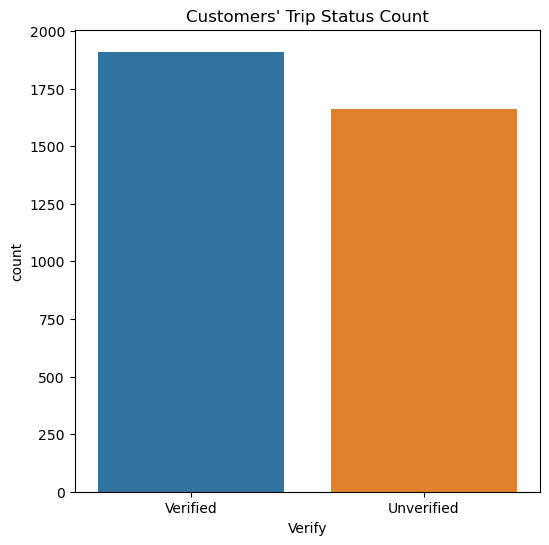

In [133]:
plt.figure(figsize=(6,6), dpi=100)
plt.title("Customers' Trip Status Count")
sns.countplot(data=british_df, x="Verify")

<AxesSubplot:title={'center':"Overall Customers' Sentiment"}, xlabel='Sentiment', ylabel='count'>

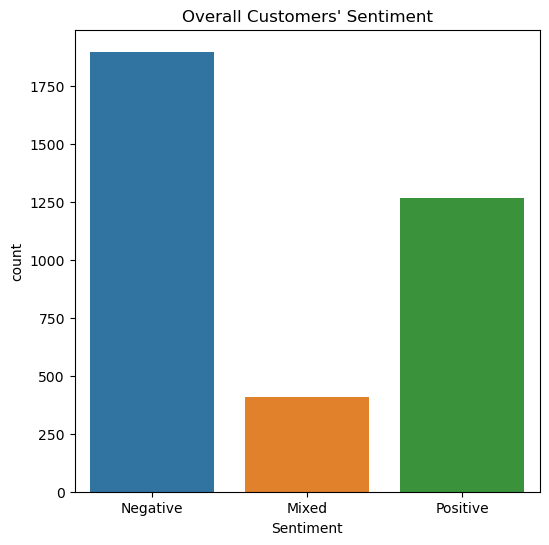

In [134]:
plt.figure(figsize=(6,6), dpi=100)
plt.title("Overall Customers' Sentiment")
sns.countplot(data=british_df, x="Sentiment")

<AxesSubplot:title={'center':"Verified and Unverified Customers' Sentiment"}, xlabel='Verify', ylabel='count'>

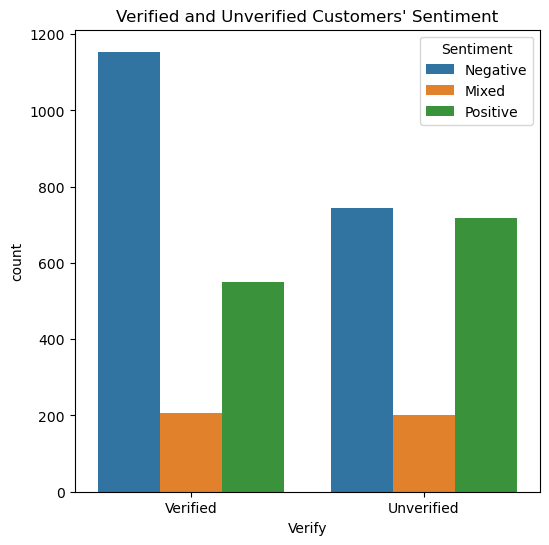

In [135]:
plt.figure(figsize=(6,6), dpi=100)
plt.title("Verified and Unverified Customers' Sentiment")
sns.countplot(data=british_df, x="Verify", hue="Sentiment")

The next step is to find words that is commonly used by people expressing a particular sentiment. These words are then sorted for the top 50 and cross-referenced with other words-bank to make sure they do not exist in other sentiment expression. This is shown below

In [136]:
cv_neg = CountVectorizer(stop_words="english")
matrix_neg = cv_neg.fit_transform(british_df[british_df['Sentiment']=='Negative']['Review'])
freqs_neg = zip(cv_neg.get_feature_names_out(), matrix_neg.sum(axis=0).tolist()[0])    
# sort from largest to smallest
one_word_neg = sorted(freqs_neg, key=lambda x: -x[1])[:50]

In [137]:
print("Top 50 words used for Negative reviews.")
print(one_word_neg)

Top 50 words used for Negative reviews.
[('flight', 3703), ('ba', 2836), ('service', 1490), ('british', 1367), ('airways', 1362), ('london', 1258), ('seat', 1220), ('seats', 1105), ('class', 1080), ('food', 1062), ('business', 969), ('time', 924), ('staff', 923), ('cabin', 850), ('crew', 807), ('heathrow', 770), ('hours', 767), ('airline', 762), ('economy', 715), ('check', 702), ('told', 687), ('just', 640), ('did', 620), ('passengers', 609), ('plane', 605), ('customer', 593), ('flights', 591), ('fly', 569), ('hour', 509), ('return', 507), ('airlines', 481), ('airport', 453), ('experience', 446), ('good', 446), ('meal', 442), ('boarding', 433), ('got', 415), ('like', 415), ('poor', 410), ('booked', 399), ('asked', 397), ('club', 393), ('new', 393), ('luggage', 390), ('minutes', 385), ('long', 382), ('aircraft', 372), ('premium', 363), ('offered', 361), ('lounge', 358)]


In [138]:
cv_pos = CountVectorizer(stop_words="english")
matrix_pos = cv_pos.fit_transform(british_df[british_df['Sentiment']=='Positive']['Review'])
freqs_pos = zip(cv_pos.get_feature_names_out(), matrix_pos.sum(axis=0).tolist()[0])    
# sort from largest to smallest
one_word_pos = sorted(freqs_pos, key=lambda x: -x[1])[:50]

In [139]:
print("Top 50 words used for Negative reviews.")
print(one_word_pos)

Top 50 words used for Negative reviews.
[('flight', 2134), ('good', 1265), ('ba', 1216), ('crew', 963), ('service', 937), ('food', 904), ('time', 815), ('cabin', 750), ('seat', 728), ('london', 680), ('seats', 637), ('heathrow', 553), ('british', 535), ('airways', 521), ('lhr', 496), ('class', 493), ('club', 474), ('economy', 465), ('staff', 463), ('lounge', 456), ('comfortable', 447), ('excellent', 442), ('boarding', 406), ('flights', 404), ('return', 397), ('great', 395), ('friendly', 384), ('check', 375), ('new', 366), ('business', 361), ('drinks', 357), ('nice', 351), ('aircraft', 338), ('experience', 322), ('really', 308), ('world', 283), ('plane', 262), ('just', 260), ('served', 260), ('meal', 247), ('breakfast', 241), ('did', 241), ('passengers', 241), ('flew', 237), ('better', 233), ('long', 230), ('overall', 228), ('quite', 217), ('efficient', 213), ('like', 213)]


In [140]:
def inFirstnotSecond(first, second):
    
    first_list = []
    for ent1 in first:
        for ent2 in second:
            if ent1[0] == ent2[0]:
                break
            if ent2 == second[-1]:
                first_list.append(ent1)
                    
    return first_list

These are the most common words used by people expressing a negative sentiment.

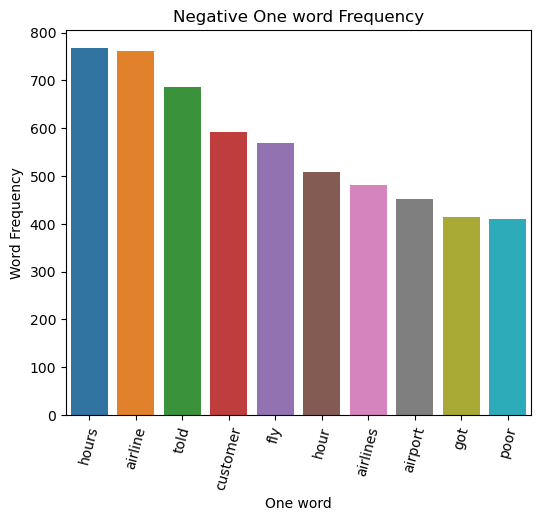

In [141]:
one_neg_df = pd.DataFrame(inFirstnotSecond(one_word_neg,one_word_pos), columns=["x", "y"])
plt.figure(figsize=(6,5), dpi=100)
sns.barplot(data=one_neg_df.head(10), x="x", y="y")
plt.xlabel("One word")
plt.ylabel("Word Frequency")
plt.title("Negative One word Frequency")
plt.xticks(rotation=75);

A similar thing is done for positive sentiments.

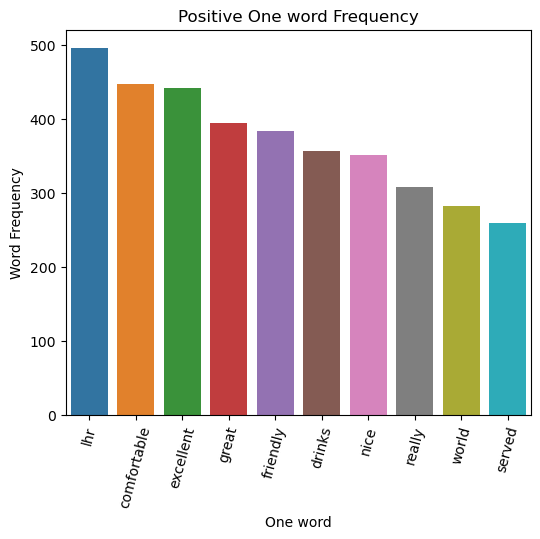

In [142]:
one_neg_df = pd.DataFrame(inFirstnotSecond(one_word_pos,one_word_neg), columns=["x", "y"])
plt.figure(figsize=(6,5), dpi=100)
sns.barplot(data=one_neg_df.head(10), x="x", y="y")
plt.xlabel("One word")
plt.ylabel("Word Frequency")
plt.title("Positive One word Frequency")
plt.xticks(rotation=75);

A lot of these words make sense and refer to specific aspects of the flight services but this can be improved by looking at phrases instead as done below.

In [143]:
cv2_pos = CountVectorizer(stop_words="english",ngram_range=(2, 2))
matrix_ = cv2_pos.fit_transform(british_df[british_df['Sentiment']=='Positive']['Review'])
combined = zip(cv2_pos.get_feature_names_out(), matrix_.sum(axis=0).tolist()[0])
two_word_pos =  sorted(combined, key=lambda x: -x[1])[:50]

In [144]:
print("Top 50 words used for Positive reviews")
print(two_word_pos)

Top 50 words used for Positive reviews
[('british airways', 504), ('cabin crew', 354), ('business class', 247), ('london heathrow', 246), ('club world', 202), ('premium economy', 143), ('club europe', 117), ('return flight', 101), ('long haul', 90), ('food good', 89), ('good flight', 87), ('leg room', 79), ('upper deck', 78), ('crew friendly', 67), ('hour flight', 62), ('seats comfortable', 61), ('short flight', 59), ('seat comfortable', 58), ('fly ba', 57), ('fast track', 56), ('flight time', 56), ('flight crew', 55), ('economy class', 54), ('good food', 54), ('service good', 54), ('short haul', 53), ('flight attendants', 52), ('food drinks', 51), ('world traveller', 50), ('food drink', 49), ('window seat', 49), ('flight good', 47), ('flight london', 46), ('meal service', 45), ('inflight entertainment', 44), ('crew excellent', 43), ('arrived time', 42), ('ground staff', 42), ('overall good', 42), ('ahead schedule', 41), ('good experience', 41), ('good service', 41), ('afternoon tea', 

In [145]:
cv2_neg = CountVectorizer(stop_words="english",ngram_range=(2, 2))
matrix_ = cv2_neg.fit_transform(british_df[british_df['Sentiment']=='Negative']['Review'])
combined = zip(cv2_neg.get_feature_names_out(), matrix_.sum(axis=0).tolist()[0])
two_word_neg =  sorted(combined, key=lambda x: -x[1])[:50]

In [146]:
print("Top 50 words used for Positive reviews")
print(two_word_neg)

Top 50 words used for Positive reviews
[('british airways', 1318), ('business class', 682), ('customer service', 343), ('cabin crew', 335), ('london heathrow', 323), ('premium economy', 180), ('return flight', 161), ('long haul', 157), ('hour flight', 139), ('connecting flight', 122), ('club europe', 120), ('flight delayed', 116), ('club world', 111), ('leg room', 108), ('fly ba', 101), ('economy class', 100), ('low cost', 94), ('flight cancelled', 90), ('cabin staff', 81), ('budget airline', 80), ('flight london', 79), ('inflight entertainment', 77), ('ba staff', 75), ('ba flight', 69), ('short haul', 69), ('ground staff', 67), ('booked flight', 66), ('flight ba', 66), ('flying ba', 66), ('boarding pass', 65), ('middle seat', 64), ('fly british', 63), ('food drink', 60), ('flight attendants', 58), ('hours flight', 57), ('flight attendant', 56), ('ba customer', 54), ('24 hours', 53), ('american airlines', 53), ('20 minutes', 52), ('flight time', 52), ('hand luggage', 52), ('30 minutes'

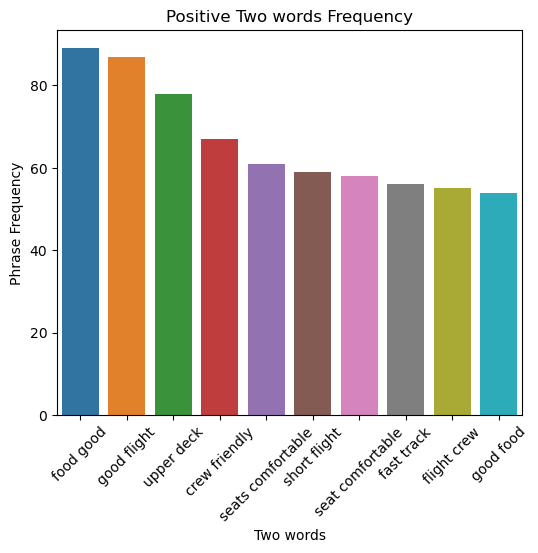

In [147]:
d2 = pd.DataFrame(inFirstnotSecond(two_word_pos,two_word_neg), columns=["x", "y"])
plt.figure(figsize=(6,5), dpi=100)
sns.barplot(data=d2.head(10), x="x", y="y")
plt.xlabel("Two words")
plt.ylabel("Phrase Frequency")
plt.title("Positive Two words Frequency")
plt.xticks(rotation=45);

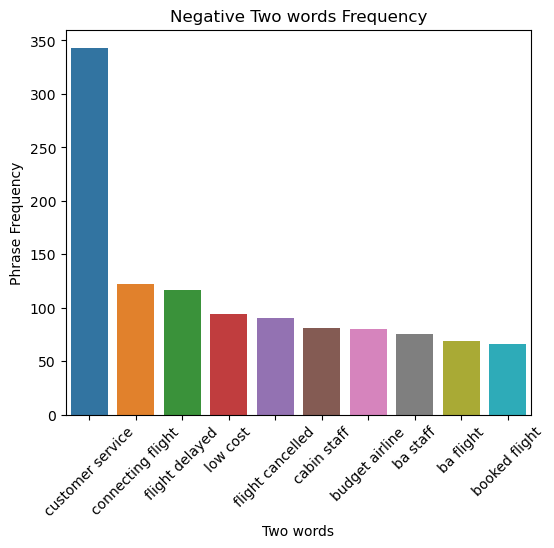

In [148]:
d2 = pd.DataFrame(inFirstnotSecond(two_word_neg,two_word_pos), columns=["x", "y"])
plt.figure(figsize=(6,5), dpi=100)
sns.barplot(data=d2.head(10), x="x", y="y")
plt.xlabel("Two words")
plt.ylabel("Phrase Frequency")
plt.title("Negative Two words Frequency")
plt.xticks(rotation=45);

The phrases refected by both positive and negative sentiments now make more sense and tend to refer to very specific aspect of the services. The same can be done for phrases with three words as follows;

In [149]:
cv3_pos = CountVectorizer(stop_words="english",ngram_range=(3, 3))
matrix_ = cv3_pos.fit_transform(british_df[british_df["Sentiment"] == "Positive"]["Review"])
combined = zip(cv3_pos.get_feature_names_out(), matrix_.sum(axis=0).tolist()[0])
three_word_pos = sorted(combined, key=lambda x: -x[1])[:50]

In [150]:
print("Top 50 words used for Positive reviews")
print(three_word_pos)

Top 50 words used for Positive reviews
[('flew british airways', 39), ('world traveller plus', 33), ('cabin crew friendly', 31), ('british airways flight', 30), ('heathrow british airways', 24), ('fast track security', 22), ('flight left time', 21), ('club world cabin', 20), ('british airways london', 19), ('new york jfk', 19), ('overall good flight', 19), ('long haul flight', 18), ('ba club world', 17), ('flight departed time', 17), ('london heathrow british', 17), ('business class seats', 16), ('flight british airways', 16), ('flying british airways', 16), ('boeing 747 400', 15), ('cabin crew excellent', 15), ('service cabin crew', 14), ('left arrived time', 12), ('plenty leg room', 12), ('premium economy cabin', 12), ('british airways good', 11), ('cabin crew efficient', 11), ('cabin crew good', 11), ('cabin crew polite', 11), ('club world seat', 11), ('flew london heathrow', 11), ('flight cabin crew', 11), ('flown british airways', 11), ('fly british airways', 11), ('friendly cabin

In [151]:
cv3_neg = CountVectorizer(stop_words="english",ngram_range=(3, 3))
matrix_ = cv3_neg.fit_transform(british_df[british_df["Sentiment"] == "Negative"]["Review"])
combined = zip(cv3_neg.get_feature_names_out(), matrix_.sum(axis=0).tolist()[0])
three_word_neg = sorted(combined, key=lambda x: -x[1])[:50]

In [152]:
print("Top 50 words used for Positive reviews")
print(three_word_neg)

Top 50 words used for Positive reviews
[('fly british airways', 60), ('british airways flight', 46), ('flew british airways', 44), ('business class seats', 38), ('heathrow british airways', 36), ('long haul flight', 36), ('london british airways', 32), ('airways business class', 31), ('business class passengers', 31), ('world traveller plus', 31), ('ba customer service', 30), ('british airways business', 30), ('flight british airways', 28), ('flying british airways', 28), ('business class seat', 27), ('long haul flights', 26), ('flight delayed hours', 25), ('british airways customer', 24), ('business class flight', 23), ('experience british airways', 23), ('london heathrow british', 23), ('missed connecting flight', 23), ('ba business class', 22), ('british airways london', 22), ('low cost airline', 22), ('extra leg room', 21), ('boeing 747 400', 20), ('british airways staff', 20), ('flown british airways', 20), ('short haul flights', 19), ('business class experience', 18), ('flew lond

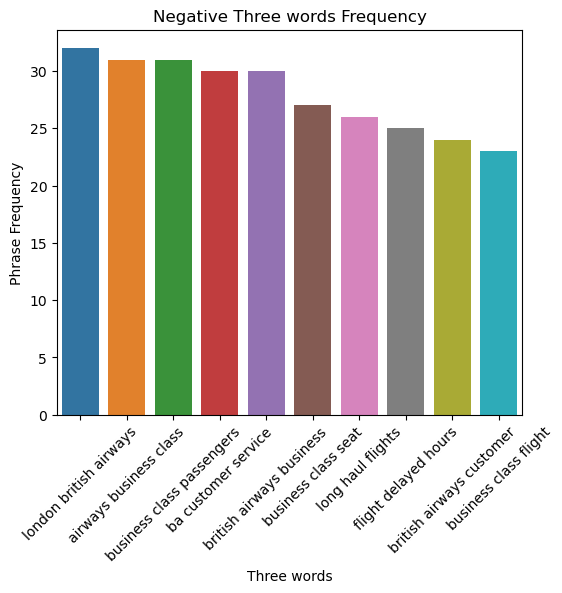

In [153]:
p3 = pd.DataFrame(inFirstnotSecond(three_word_neg,three_word_pos), columns=["x", "y"])
plt.figure(figsize=(6,5), dpi=100)
sns.barplot(data=p3.head(10), x="x", y="y")
plt.xlabel("Three words")
plt.ylabel("Phrase Frequency")
plt.title("Negative Three words Frequency")
plt.xticks(rotation=45);

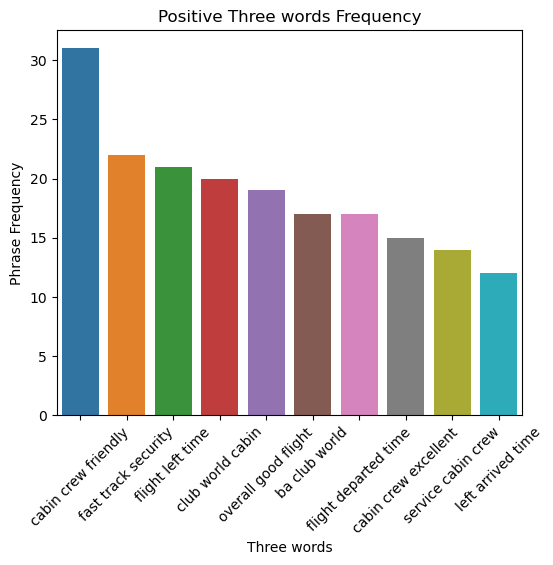

In [154]:
p3 = pd.DataFrame(inFirstnotSecond(three_word_pos,three_word_neg), columns=["x", "y"])
plt.figure(figsize=(6,5), dpi=100)
sns.barplot(data=p3.head(10), x="x", y="y")
plt.xlabel("Three words")
plt.ylabel("Phrase Frequency")
plt.title("Positive Three words Frequency")
plt.xticks(rotation=45);

# Conclusion

In general we can see that for people sharing positive sentiments, they refer to the following;

+ Good food
+ Good flight
+ Friendly crew
+ Comforatable seats
+ Punctuality of the flight 
+ Fast track service

Those that expressed negative sentiments refer to;
+ Delayed flight
+ Customer services
+ Cancelled flight
and they seem to have issues with
+ British Airways Flight
+ British Airways Staff
+ Connecting Flights, etc

These form of analysis are very important for airlines like british airways and concentration can be made on the defect points. With the provision of additional data, it is possible for one to do some analysis which would pick up possible trends of some of these issues as it could be related to specific days and times or specific staff. Appropriate actions can then be carried out.